<a href="https://colab.research.google.com/github/NishaDCosta/YIT---Internship-Project/blob/master/ASSIGNMENT_1_on_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [0]:
df.drop('PassengerId',axis=1,inplace=True)
df.drop('Name',axis=1,inplace=True)
df.drop('Ticket',axis=1,inplace=True)
df.drop('Cabin',axis=1,inplace=True)

In [3]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [4]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [5]:
import numpy as np
s_var,count=np.unique(df['Survived'],return_counts=True)
print(s_var)
print(f"survived:{count[1]}")
print(f"not survived:{count[0]}")

[0 1]
survived:342
not survived:549


In [6]:
df['Survived'].mean()

0.3838383838383838

Age has 177 missing values fill it with mean value of age


In [0]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [8]:
df['Age'].isnull().sum()

0

In [9]:
passenger_age=df.groupby(['Age']).mean()
passenger_age

,Survived,Pclass,SibSp,Parch,Fare
Age,,,,,
0.42,1.0,3.0,0.0,1.0,8.5167
0.67,1.0,2.0,1.0,1.0,14.5000
0.75,1.0,3.0,2.0,1.0,19.2583
0.83,1.0,2.0,0.5,1.5,23.8750
0.92,1.0,1.0,1.0,2.0,151.5500
...,...,...,...,...,...
70.00,0.0,1.5,0.5,0.5,40.7500
70.50,0.0,3.0,0.0,0.0,7.7500
71.00,0.0,1.0,0.0,0.0,42.0792


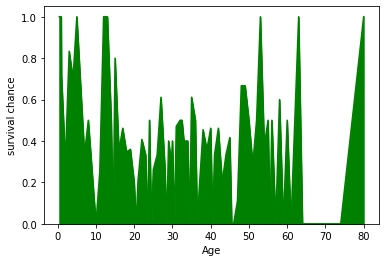

In [40]:
import matplotlib.pyplot as plt
passenger_age['Survived'].plot.area(color='g')
plt.ylabel("survival chance")
plt.show()

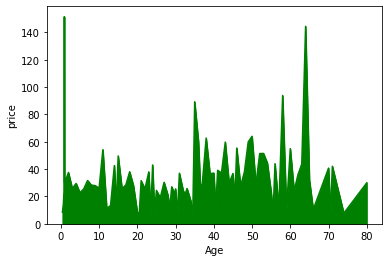

In [41]:
passenger_age['Fare'].plot.area(color='g')
plt.ylabel("price")
plt.show()

In [13]:
df['Embarked'].isnull().sum()

2

Embarked has 2 missing values fill it with most common value 'S'

In [0]:
df['Embarked'].fillna('S', inplace=True)

In [15]:
df['Embarked'].isnull().sum()

0

In [16]:
passenger_emb=df.groupby(['Embarked']).mean()
passenger_emb

,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,
C,0.553571,1.886905,30.562419,0.386905,0.363095,59.954144
Q,0.389610,2.909091,29.113724,0.428571,0.168831,13.276030
S,0.339009,2.346749,29.544382,0.569659,0.411765,27.243651


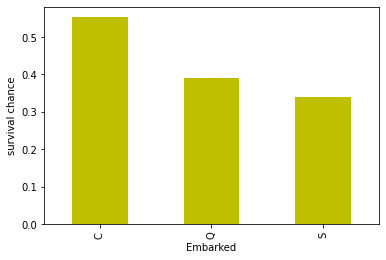

In [43]:
passenger_emb['Survived'].plot.bar(color='y')
plt.ylabel("survival chance")
plt.show()

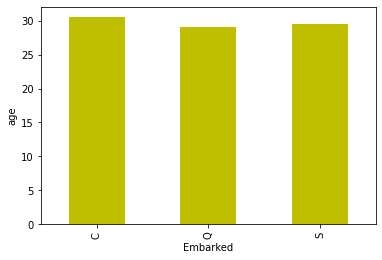

In [44]:
passenger_emb['Age'].plot.bar(color='y')
plt.ylabel("age")
plt.show()

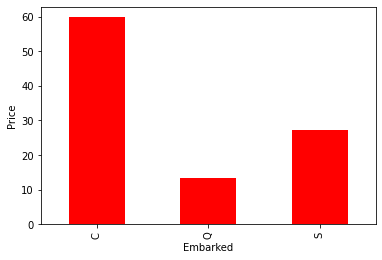

In [45]:
passenger_emb['Fare'].plot.bar(color='r')
plt.ylabel("Price")
plt.show()

In [20]:
passenger_embr=df.groupby(['Embarked','Sex']).mean()
passenger_embr

Survived    Pclass        Age     SibSp     Parch       Fare
Embarked Sex                                                                 
C        female  0.876712  1.726027  28.566978  0.547945  0.493151  75.169805
         male    0.305263  2.010526  32.095759  0.263158  0.263158  48.262109
Q        female  0.750000  2.888889  27.896634  0.222222  0.222222  12.634958
         male    0.073171  2.926829  30.182389  0.609756  0.121951  13.838922
S        female  0.692683  2.185366  28.148220  0.829268  0.780488  39.143456
         male    0.174603  2.421769  30.193391  0.448980  0.240363  21.711996

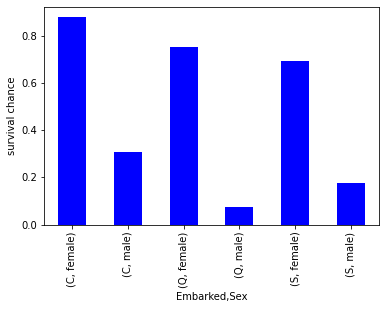

In [21]:
passenger_embr['Survived'].plot.bar(color='b')
plt.ylabel("survival chance")
plt.show()

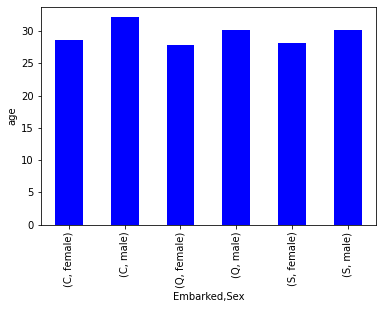

In [22]:
passenger_embr['Age'].plot.bar(color='b')
plt.ylabel("age")
plt.show()

In [23]:
import numpy as np
s_var,count=np.unique(df['Pclass'],return_counts=True)
print(s_var)
print(f"first class:{count[0]}")
print(f"second class:{count[1]}")
print(f"third class:{count[2]}")

[1 2 3]
first class:216
second class:184
third class:491


In [24]:
class_group=df.groupby('Pclass').mean()
class_group

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,37.048118,0.416667,0.356481,84.154687
2,0.472826,29.866958,0.402174,0.380435,20.662183
3,0.242363,26.403259,0.615071,0.393075,13.675550


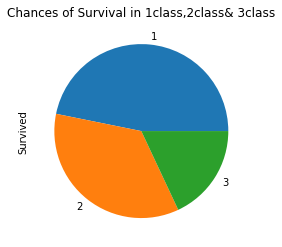

In [25]:
import matplotlib.pyplot as plt
class_group['Survived'].plot.pie()
plt.title("Chances of Survival in 1class,2class& 3class")
plt.show()

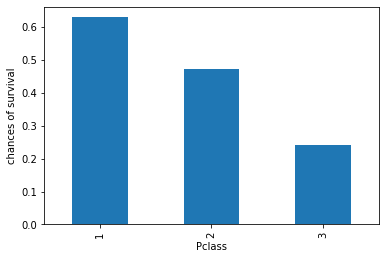

In [26]:
import matplotlib.pyplot as plt
class_group['Survived'].plot.bar()
plt.ylabel("chances of survival")
plt.show()

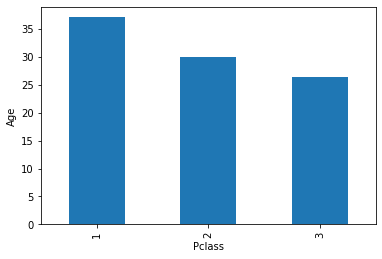

In [27]:
class_group['Age'].plot.bar()
plt.ylabel("Age")
plt.show()

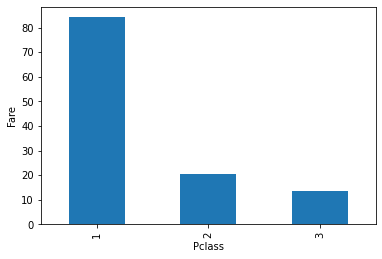

In [28]:
class_group['Fare'].plot.bar()
plt.ylabel("Fare")
plt.show()

In [29]:
passenger_gender=df.groupby('Sex').mean()
passenger_gender

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,0.742038,2.159236,28.216730,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.505824,0.429809,0.235702,25.523893


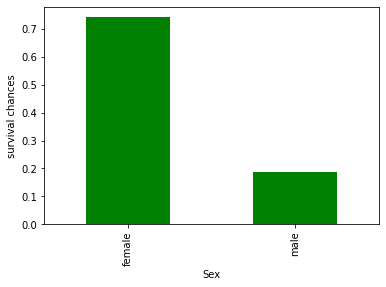

In [46]:
passenger_gender['Survived'].plot.bar(color='g')
plt.ylabel("survival chances")
plt.show()

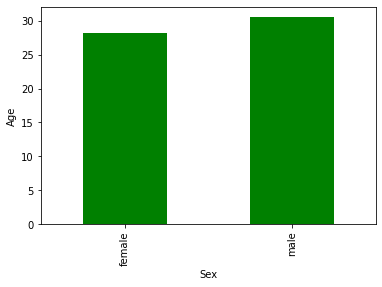

In [47]:
passenger_gender['Age'].plot.bar(color='g')
plt.ylabel("Age")
plt.show()

In [32]:
import numpy as np
s_var,count=np.unique(df['Sex'],return_counts=True)
print(s_var)
print(f"female:{count[0]}")
print(f"male:{count[1]}")

['female' 'male']
female:314
male:577


In [33]:
passenger_class=df.groupby(['Pclass','Sex']).mean()
passenger_class

Survived        Age     SibSp     Parch        Fare
Pclass Sex                                                        
1      female  0.968085  34.141405  0.553191  0.457447  106.125798
       male    0.368852  39.287717  0.311475  0.278689   67.226127
2      female  0.921053  28.748661  0.486842  0.605263   21.970121
       male    0.157407  30.653908  0.342593  0.222222   19.741782
3      female  0.500000  24.068493  0.895833  0.798611   16.118810
       male    0.135447  27.372153  0.498559  0.224784   12.661633

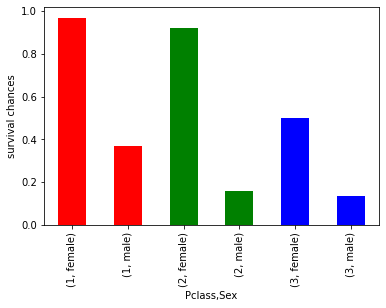

In [48]:
c=['r','r','g','g','b','b']
passenger_class['Survived'].plot.bar(color=c)
plt.ylabel("survival chances")
plt.show()

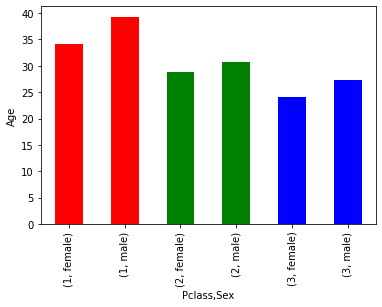

In [49]:
c=['r','r','g','g','b','b']
passenger_class['Age'].plot.bar(color=c)
plt.ylabel("Age")
plt.show()

In [38]:
passenger_relative=df.groupby(['Parch','SibSp']).sum()
passenger_relative

Survived  Pclass           Age        Fare
Parch SibSp                                            
0     0           163    1289  16966.982647  11407.3238
      1            64     241   3894.681471   5241.0795
      2             4      39    503.097353    662.5792
      3             2       5     63.000000     36.8500
1     0            25      68   1122.119118   2791.8752
      1            34     127   1550.597353   2073.6458
      2             6      17     58.500000    174.2749
      3             0      21    131.796471    165.0918
      4             0      27     61.000000    314.9375
2     0            21      61    634.927353   1312.4082
      1            12      35    407.318235   1360.6876
      2             2       8     69.000000    593.5000
      3             2      15     91.000000    900.6000
      4             3      27     66.000000    258.4625
      5             0      15     51.000000    234.5000
      8             0      21    207.893824    486.8500
3     0             1       3     24.000000     19.2583
      1             1       8    118.000000     91.7500
      2             1       2     24.000000     18.7500
4     0             0       3     29.000000     21.0750
      1             0       7    149.000000    318.8000
5     0             0       6     80.000000     68.8125
      1             1       9    116.000000     93.9375
6     1             0       3     43.000000     46.9000

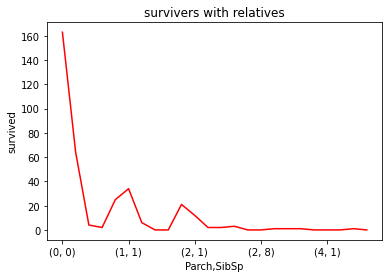

In [51]:
passenger_relative['Survived'].plot.line(color='r')
plt.ylabel("survived")
plt.title('survivers with relatives')
plt.show()